# Linear Regression With One Variable (using array-type data)

The notebook aims to study and implement a linear regression model with one variable. The diabetes dataset will be used to construct a linear model.


## Acknowledgments

- Used dataset: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html or diabetes from the "sklearn" package

- Inquiries: mauricio.antelis@tec.mx


## Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily
#from sklearn import datasets
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

## Importing data

In [2]:
# Import datsets
#from sklearn import datasets

# Load the diabetes dataset
#Xraw, yraw = datasets.load_diabetes(return_X_y=True)

# Load the diabetes dataset
data = np.loadtxt("diabetes.txt")
Xraw    = data[:,:-1]
yraw    = data[:,-1]

## Undertanding the dataset

Get a general 'feel' of the dataset

In [3]:
# Number of predictors/variables/features and obsertations in the dataset
print(Xraw.shape)
print(yraw.shape)


(442, 10)
(442,)


Characteristics of the dataset

1. The dataset description
    - Many observations/measurements/recordings of the characteristics/attributes/variables of persons
    - Variables: age, sex, bmi, bp, tc, ... (10 variables)
    - Total numer of observations: 442


2. Description of the predictors/variables/features/attributes (independant variable)
    - age in years
    - sex
    - bmi body mass index
    - bp average blood pressure
    - s1 tc, total serum cholesterol
    - s2 ldl, low-density lipoproteins
    - s3 hdl, high-density lipoproteins
    - s4 tch, total cholesterol / HDL
    - s5 ltg, possibly log of serum triglycerides level
    - s6 glu, blood sugar level


3. Description of the response (dependant variable)
    - quantitative measure of disease progression one year after baseline

Note:
- In case you uploaded the dataset using sklearn, each of the 10 variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1)

## Problem description

Predicting disease progression ($y$) based on body mass index ($x$) 

$disease = f(bmi)$

or 

$y = f(x)$

## Dataset: one variable and one response

Let's select only one predictor/variable/feature

In [4]:
# Use only one predictor/variable/feature
X = Xraw[:, np.newaxis, 2]

y = yraw[:]

In [5]:
# X
print(X.min())
print(X.mean())
print(X.max())

18.0
26.37579185520362
42.2


In [6]:
# y
print(y.min())
print(y.mean())
print(y.max())

25.0
152.13348416289594
346.0


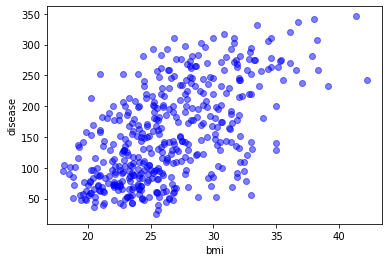

In [7]:
# Scatter plot of the data

plt.scatter(X, y, c='b', label='Train set', alpha=0.5)

plt.xlabel('bmi')
plt.ylabel('disease')

plt.show()

The scatter plot shows a linear positive relationship between body mass index $x$ and disease $y$: note that that we can draw a straight line with positive slope which somehow fits the values on chart


## Description of the linear model

We want to built a (linear) model that predicts **disease** ($y$) based on the **body mass index** ($x$), that is:

$disease = m \cdot bmi + b$

or

$y = m \cdot x + b$

This is general form of a linear model, where $y$ is the dependent variable, $x$ is the independet variable and 
$b$ (intercept) and $m$ (slope) are the unknown model parameters (or coefficients) that will be estimated from the data.

- $y$: response 
- $x$: predictor/variable/feature
- $m$: coefficient (slope)
- $b$: intercept

Note: the linear equation is attributed to René Descartes (AD 1596-1650), Father of Analytic Geometry.

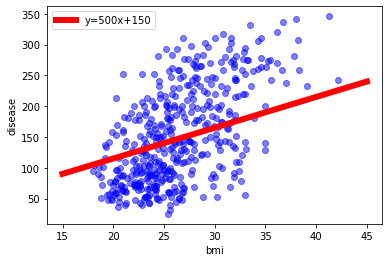

In [8]:
# Create straigh line for the data
xl = np.linspace(15,45,100)
yl1 =  5*xl + 15
#yl2 = 10*xl + 17
#yl3 = 15*xl + -10

# Scatter plot of the data and a linear model
plt.scatter(X, y, c='b', alpha=0.5)
plt.plot(xl, yl1, '-r', label='y=500x+150', linewidth=6)
#plt.plot(x, y2, '-.r', label='y=1000x+100')
#plt.plot(x, y3, '--r', label='y=1500x+97')

plt.xlabel('bmi')
plt.ylabel('disease')
plt.legend()

plt.show()


Which straight line (i.e., $m$ and $b$) should we choose based on the data?

We choose the straight line (i.e., $m$ and $b$) where total sum of error is minimum

The total sum of errors is defined as ...

In [9]:
# Create a linear model for the data
#xl = np.linspace(15,45,100)
#yl =  5*xl + 15


# Scatter plot of the data and a linear model

#plt.scatter(diabetes_X, diabetes_y, c='b', label='Train set', alpha=0.5)
#plt.plot(xl, yl, ':r', label='y=1000x+100')

#plt.xlabel('bmi')
#plt.ylabel('disease')
#plt.legend()

#plt.show()

## Splitt the data in train and test sets

Split the data into train/test sets

In [10]:
# Get train set
Xtrain = X[:-5]
Xtest  = X[-5:]

# Get test set
ytrain = y[:-5]
ytest  = y[-5:]

Undertand the train and test sets

In [11]:
# Train data
print(Xtrain.shape)
print(ytrain.shape)

(437, 1)
(437,)


In [12]:
# Xtrain
# ytrain

In [13]:
# Test data
print(Xtest.shape)
print(ytest.shape)

(5, 1)
(5,)


In [14]:
# Xtest
# ytest

Plot both train and test sets

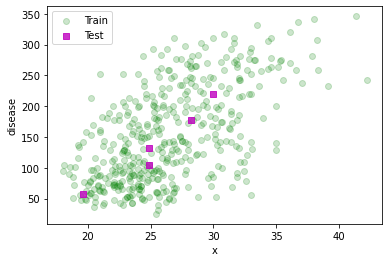

In [15]:
# Scatter plot of the train and test sets
plt.scatter(Xtrain, ytrain, c='g', marker='o', label='Train', alpha=0.2)
plt.scatter(Xtest,  ytest,  c='m', marker='s', label='Test ', alpha=0.8)

plt.xlabel('x')
plt.ylabel('disease')
plt.legend()

plt.show()

The train set will be used to fit the linear repression model

The test set will be used to assess the model

## Creating the linear regression model

Creating the linear reggresion model

In [16]:
# Import sklearn linear_model
from sklearn import linear_model

# Create linear regression object
regmodel = linear_model.LinearRegression()

# Train the model using the training sets
regmodel.fit(Xtrain, ytrain)

LinearRegression()

## Undertanding the model

Coefficient (slope) $m$ and intercept $b$

In [17]:
# Model coefficient (slope)
regmodel.coef_
print("Coefficients: \n", regmodel.coef_)

# Get model coefficient (slope) 
m = regmodel.coef_[0]
print("m =", m)

Coefficients: 
 [10.19146068]
m = 10.191460675883958


In [18]:
# Model intercept
regmodel.intercept_
print("Intercept: \n", regmodel.intercept_)

# Get model intercept
b = regmodel.intercept_
print("b =", b)

Intercept: 
 -116.61473071688783
b = -116.61473071688783


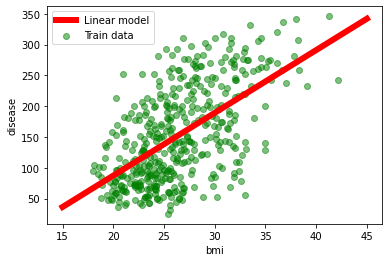

In [19]:
# Create data for the linear model
yl =  m*xl + b

# Plot scatter plot of the data and the linear model
plt.scatter(Xtrain, ytrain, c='g', label='Train data', marker='o', alpha=0.5)
plt.plot(xl, yl, '-r', label='Linear model', linewidth=6)

plt.xlabel('bmi')
plt.ylabel('disease')
plt.legend()

plt.show()

The straight line can be seen in the plot, that best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

Coefficient of determination $R^2$

In [20]:
# Calculate the Coefficient of determination of the prediction
regmodel.score(Xtrain, ytrain)

0.34070006005299813

The coefficient of determination $R^2$ is defined as $R^2 = 1- u/v$ 

- $u$ is the residual sum of squares:  ((y_true - y_pred)** 2).sum() 
- $v$ is the total sum of squares: ((y_true - y_true.mean()) ** 2).sum()

The best possible $R^2$ score is 1.0 and this indicates ...

A constant model that always predicts the expected value of $y$, disregarding the input $x$, would get a $R^2$ score of 0.0.

Note: see *.ipynb to undertand for in detail the coefficient of determination $R^2$

## Make predictions

Make predictions using a new $x$

In [21]:
xnew = 30
ynew = regmodel.predict([[xnew]])


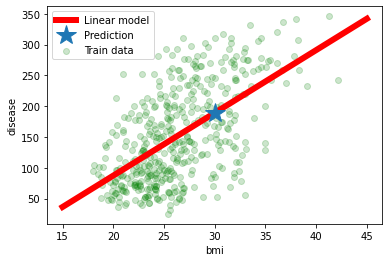

In [22]:
# Plot scatter plot of the data, the linear model, and (xnew,ynew)
plt.scatter(Xtrain, ytrain, c='g', label='Train data', marker='o', alpha=0.2)
plt.plot(xl, yl, '-r', label='Linear model', linewidth=6)

plt.plot(xnew, ynew, '*', label='Prediction' , markersize=20)

plt.xlabel('bmi')
plt.ylabel('disease')
plt.legend()

plt.show()

Make predictions using several predictors $x$


In [24]:
xnew = np.array([[20, 30, 40]]).T
ynew = regmodel.predict(xnew)


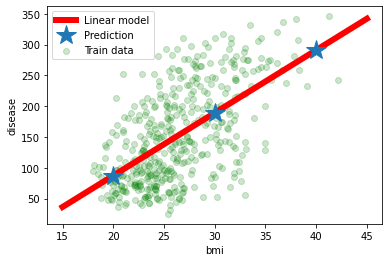

In [25]:
# Plot scatter plot of the data, the linear model, and (xnew,ynew)
plt.scatter(Xtrain, ytrain, c='g', label='Train data', marker='o', alpha=0.2)
plt.plot(xl, yl, '-r', label='Linear model', linewidth=6)

plt.plot(xnew, ynew, '*', label='Prediction' , markersize=20)

plt.xlabel('bmi')
plt.ylabel('disease')
plt.legend()

plt.show()

Make predictions using a test set

In [26]:
#Xtest

In [27]:
ypred = regmodel.predict(Xtest)

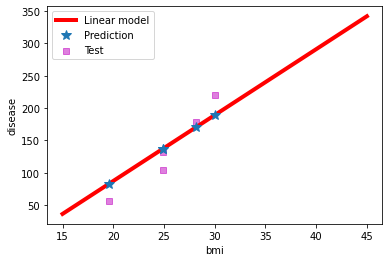

In [28]:
# Plot scatter plot of the train data, the linear model, test data, and predicted data

#plt.scatter(Xtrain, ytrain, c='g', label='Train', marker='o', alpha=0.2)
plt.scatter(Xtest,  ytest,  c='m', label='Test ', marker='s',  alpha=0.5)

plt.plot(xl, yl, '-r', label='Linear model', linewidth=4)

plt.plot(Xtest, ypred, '*', label='Prediction' , markersize=10)

plt.xlabel('bmi')
plt.ylabel('disease')
plt.legend()

plt.show()

## Assess model performance

Compute performance metrics

In [29]:
# Import metrics functions
from sklearn.metrics import mean_squared_error, r2_score

# Compute the mean squared error (mse)
mse = mean_squared_error(ytest, ypred)

print("Mean squared error: %.2f" % mse)

# mse = 562.78

Mean squared error: 562.78


In [30]:
# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(ytest, ypred)

print("Coefficient of determination: %.2f" % r2)

# r2 = 0.82

Coefficient of determination: 0.82


# Final remarks


- Linear represion models
    - xxx
    - xxx

- xxx
    - xxx
    - xxx


# Activity: work with more independent variables



1. Repeat this notebook with each one of the independant variables
    - Argue about the use of numerical (e.g., bpmi) and categorical (e.g., sex) independant variables
    
    
2. Which one of the ten independant variables provides the higest linear relationship with the dependent variable (disease)
    - Is this relationship positive or nenative?
    - Argue your response


3. Which is the second independant variable that provides the higest linear relationship with the dependent variable (disease)
    - Is this relationship positive or nenative?
    - Argue your response


4. What do you think about predictic the disease using two or more independent variables
    - Argue your response

